In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install WordCloud
from wordcloud import WordCloud
from PIL import Image

!pip install stop-words
from stop_words import get_stop_words

!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

import tqdm
import time

from sklearn.pipeline import make_pipeline

# Used to standardize the predictors
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Method to apply logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Importing the method needed to apply KNN classification

from sklearn.neighbors import KNeighborsClassifier

import streamlit as st

In [2]:
df = pd.read_csv('Complete_dataset.csv')
df

,statement,target,anger,sadness,fear,joy,surprise,love,main_emotion,reading_time,flesch_reading_ease,SMOG_Index,readibility_consensus_grade,monosyllable_count,polysyllable_count
0,Central African Republic president Faustin-Arc...,True,0.528184,0.129380,0.290004,0.046111,0.002159,0.004162,anger,14.48,48.33,13.2,13th and 14th grade,110,25
1,Paris Jackson addresses family issues after Ja...,True,0.282781,0.200408,0.322210,0.162250,0.014220,0.018130,fear,0.90,20.04,0.0,12th and 13th grade,2,3
2,The U.S. House of Representatives ethics commi...,True,0.630080,0.106294,0.072769,0.181953,0.001379,0.007525,anger,40.00,29.38,16.9,15th and 16th grade,266,111
3,"EU In this October 21, 2016 photo provided by ...",False,0.385026,0.351781,0.212126,0.040994,0.001433,0.008641,anger,40.72,62.72,11.4,10th and 11th grade,386,46
4,"A huge rally of 10,000 Chicagoans didn t get t...",True,0.372579,0.197948,0.213057,0.208442,0.004096,0.003879,anger,5.79,78.99,9.4,8th and 9th grade,70,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203549,The views expressed herein are the views of th...,True,0.667137,0.111776,0.040695,0.165803,0.003123,0.011466,anger,6.86,41.70,13.8,13th and 14th grade,45,14
203550,\nThe Liberal media just can’t give Trump his ...,False,0.368812,0.231943,0.102861,0.280618,0.004170,0.011596,anger,30.22,69.62,10.6,10th and 11th grade,295,39
203551,JEDDAH (Reuters) - Arab countries and Qatar sh...,False,0.624848,0.110043,0.097962,0.153164,0.001184,0.012800,anger,27.91,37.98,16.2,15th and 16th grade,223,58
203552,Who says President Trump isn t moving on his a...,False,0.096386,0.058199,0.013194,0.736530,0.000972,0.094719,joy,24.34,59.33,12.5,9th and 10th grade,238,46


In [3]:
df.loc[df['target'] == True, 'label'] = '0'
df.loc[df['target'] == False, 'label'] = '1'

In [4]:
df.drop(columns=['target', 'readibility_consensus_grade'], inplace=True)

In [5]:
array = df['statement'].astype(str)
amm_words= []

for i in array:
    amm_words.append(len(i.split()))

In [6]:
monos = df['monosyllable_count'].astype(int)
polys = df['polysyllable_count'].astype(int)

monos_ratio= monos/amm_words
polys_ratio= polys/amm_words

In [7]:
df['monosyllabic_ratio'] = monos_ratio
df['polysyllabic_ratio'] = polys_ratio

### Regarding fake news, according to the Dataset

In [8]:
df_fake=df.loc[df['label']=='1']
df_fake.describe()

,anger,sadness,fear,joy,surprise,love,reading_time,flesch_reading_ease,SMOG_Index,monosyllable_count,polysyllable_count,monosyllabic_ratio,polysyllabic_ratio
count,1.033220e+05,1.033220e+05,1.033220e+05,1.033220e+05,1.033220e+05,1.033220e+05,103322.000000,103322.00000,103322.000000,103322.000000,103322.000000,102583.000000,102583.000000
mean,3.372140e-01,1.752595e-01,1.457316e-01,3.072600e-01,7.316535e-03,2.721829e-02,27.996218,58.99575,8.469974,250.815441,49.232274,0.649097,0.130719
std,2.083251e-01,1.504676e-01,1.250994e-01,2.442615e-01,2.353619e-02,6.299506e-02,41.295411,25.34773,6.004019,385.389019,73.299336,0.092550,0.067341
min,2.882556e-08,4.370817e-07,7.098673e-08,7.873676e-07,3.257011e-07,3.102027e-07,0.000000,-2078.39000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.640763e-01,8.215690e-02,5.740778e-02,1.244408e-01,1.915573e-03,8.372254e-03,1.870000,49.45000,0.000000,16.000000,3.000000,0.609868,0.098592
50%,3.442554e-01,1.327457e-01,1.186012e-01,2.264647e-01,3.974669e-03,1.479103e-02,18.540000,58.32000,11.300000,163.000000,30.000000,0.653620,0.127464
75%,4.858594e-01,2.219792e-01,2.067763e-01,4.332002e-01,8.485327e-03,2.607361e-02,37.560000,67.59000,13.000000,337.000000,67.000000,0.696861,0.158074
max,9.996574e-01,9.999213e-01,9.998869e-01,9.999971e-01,9.739862e-01,9.973941e-01,1793.440000,206.84000,35.300000,20722.000000,2685.000000,1.000000,1.000000


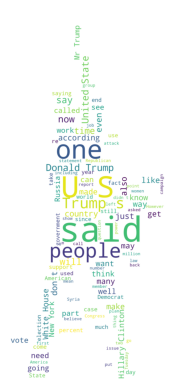

In [9]:
mask = np.array(Image.open("silhouette.png"))
mask[mask == 1] = 255

wordcloud = WordCloud(background_color = "white", 
                      stopwords = get_stop_words('en'), 
                      max_words = 100, mask = mask,
                      width=800, 
                      height=1200).generate(' '.join(df_fake['statement'].astype(str)))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show();

fig=plt.figure()
st.pyplot(fig)

Text(0.5, 1.0, 'Distribution of dominant emotions in fake texts')

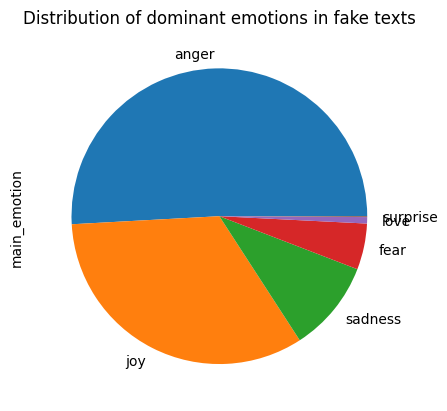

In [10]:
df_fake.main_emotion.value_counts().plot(kind='pie').set_title("Distribution of dominant emotions in fake texts")

<AxesSubplot: >

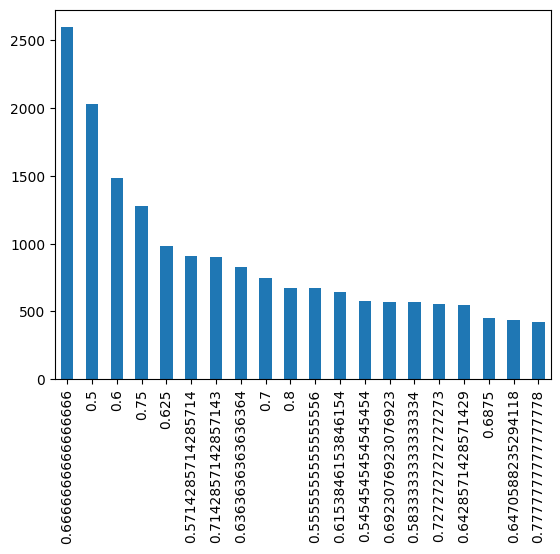

In [11]:
df_fake['monosyllabic_ratio'].value_counts().head(20).plot(kind='bar')

In [12]:
df_fake['monosyllabic_ratio'].value_counts().head(30)

0.666667    2598
0.500000    2029
0.600000    1481
0.750000    1276
0.625000     981
0.571429     908
0.714286     904
0.636364     831
0.700000     748
0.800000     675
0.555556     670
0.615385     645
0.545455     579
0.692308     569
0.583333     567
0.727273     556
0.642857     548
0.687500     450
0.647059     439
0.777778     422
0.538462     420
0.705882     366
0.333333     351
0.833333     345
0.769231     343
0.428571     339
0.733333     338
0.611111     334
0.400000     315
0.562500     314
Name: monosyllabic_ratio, dtype: int64

In [13]:
df_fake['polysyllabic_ratio'].value_counts().head(30)

0.000000    5451
0.142857    1519
0.125000    1485
0.166667    1394
0.111111    1338
0.200000    1200
0.100000    1199
0.090909    1101
0.083333     954
0.250000     861
0.153846     812
0.076923     784
0.181818     781
0.071429     709
0.133333     671
0.117647     606
0.222222     543
0.066667     541
0.062500     520
0.333333     460
0.058824     448
0.105263     410
0.157895     362
0.095238     362
0.214286     357
0.187500     355
0.176471     346
0.230769     344
0.150000     342
0.136364     330
Name: polysyllabic_ratio, dtype: int64

In the case of fake news, there tends to be ahigher ammount of monosilabic words per text, contrary to polysyllabic word which are less frequent. This could be due to how the articles are redacted or about the structure of English itself.

### Regarding real news, according to the Dataset

In [14]:
df_real=df.loc[df['label']=='0']
df_real.describe()

,anger,sadness,fear,joy,surprise,love,reading_time,flesch_reading_ease,SMOG_Index,monosyllable_count,polysyllable_count,monosyllabic_ratio,polysyllabic_ratio
count,1.002320e+05,1.002320e+05,1.002320e+05,1.002320e+05,1.002320e+05,1.002320e+05,100232.000000,100232.000000,100232.000000,100232.000000,100232.000000,99489.000000,99489.000000
mean,3.095941e-01,1.790131e-01,1.399669e-01,3.336848e-01,8.276239e-03,2.946488e-02,31.117991,59.878691,8.842326,280.590879,54.173986,0.650449,0.125262
std,2.027540e-01,1.560627e-01,1.263825e-01,2.492130e-01,2.665815e-02,6.613145e-02,47.112715,25.781767,5.860339,449.011841,81.648216,0.095851,0.067374
min,2.129364e-08,4.252192e-07,5.756760e-08,3.482524e-07,3.257011e-07,3.075110e-07,0.000000,-2078.390000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.413032e-01,8.319666e-02,5.245468e-02,1.452899e-01,1.802644e-03,8.883205e-03,2.040000,50.060000,0.000000,17.000000,3.000000,0.614173,0.095116
50%,3.062644e-01,1.353878e-01,1.106123e-01,2.600074e-01,3.841103e-03,1.597305e-02,22.430000,58.820000,11.500000,201.000000,36.000000,0.655844,0.125000
75%,4.455880e-01,2.265285e-01,1.975063e-01,4.737595e-01,9.650851e-03,2.859796e-02,41.730000,68.400000,13.100000,375.000000,74.000000,0.698413,0.153846
max,9.996571e-01,9.999213e-01,9.998869e-01,9.999981e-01,9.680811e-01,9.973941e-01,1982.280000,206.840000,35.300000,20722.000000,3083.000000,1.000000,1.000000


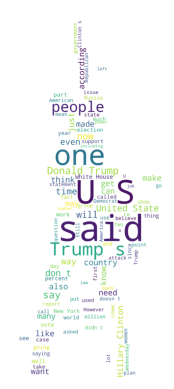

In [15]:
mask = np.array(Image.open("silhouette.png"))
mask[mask == 1] = 255

wordcloud = WordCloud(background_color = "white", 
                      stopwords = get_stop_words('en'), 
                      max_words = 100, mask = mask,
                      width=800, 
                      height=1200).generate(' '.join(df_real['statement'].astype(str)))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show();

fig=plt.figure()
st.pyplot(fig)

Text(0.5, 1.0, 'Distribution of dominant emotions in real texts')

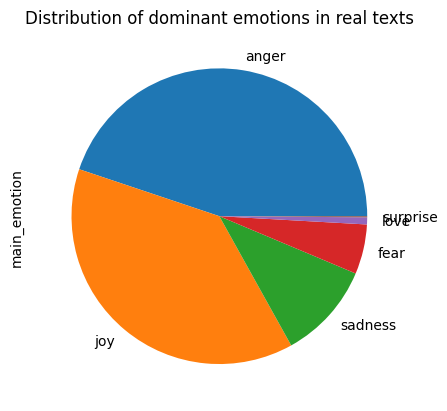

In [16]:
df_real.main_emotion.value_counts().plot(kind='pie').set_title("Distribution of dominant emotions in real texts")

<AxesSubplot: >

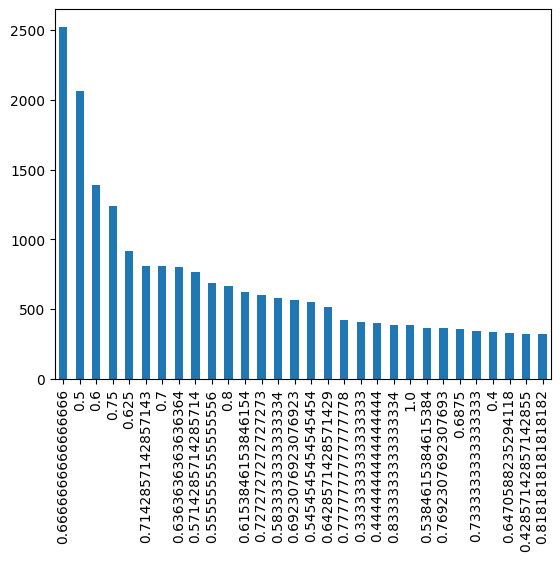

In [17]:
df_real['monosyllabic_ratio'].value_counts().head(30).plot(kind='bar')

In [18]:
df_real['monosyllabic_ratio'].value_counts().head(30)

0.666667    2523
0.500000    2066
0.600000    1389
0.750000    1235
0.625000     913
0.714286     810
0.700000     809
0.636364     802
0.571429     762
0.555556     690
0.800000     667
0.615385     619
0.727273     598
0.583333     577
0.692308     562
0.545455     552
0.642857     512
0.777778     421
0.333333     406
0.444444     403
0.833333     389
1.000000     383
0.538462     367
0.769231     366
0.687500     359
0.733333     340
0.400000     332
0.647059     329
0.428571     319
0.818182     319
Name: monosyllabic_ratio, dtype: int64

In [19]:
df_real['polysyllabic_ratio'].value_counts().head(30)

0.000000    7372
0.111111    1369
0.125000    1365
0.100000    1238
0.142857    1203
0.166667    1115
0.090909    1089
0.200000    1033
0.083333    1030
0.076923     870
0.071429     736
0.250000     696
0.181818     657
0.153846     646
0.133333     581
0.066667     539
0.222222     505
0.062500     456
0.058824     400
0.117647     385
0.333333     333
0.105263     252
0.285714     245
0.150000     241
0.230769     237
0.214286     236
0.055556     235
0.157895     220
0.187500     216
0.176471     215
Name: polysyllabic_ratio, dtype: int64

<AxesSubplot: >

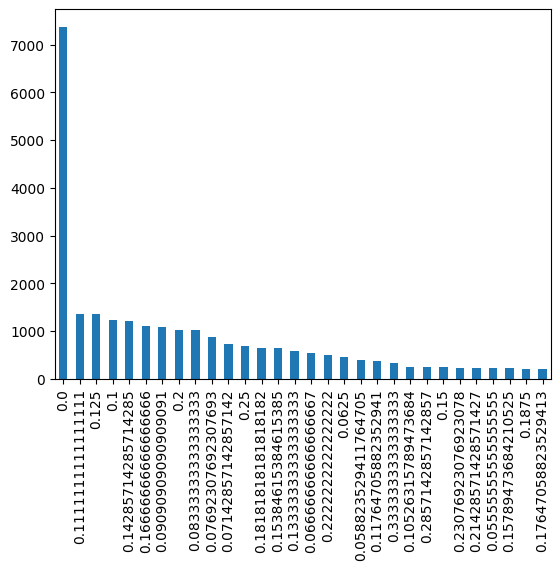

In [20]:
df_real['polysyllabic_ratio'].value_counts().head(30).plot(kind='bar')

In [21]:
df_real['flesch_reading_ease'].mean()

59.878691336100246

In [22]:
df_fake['flesch_reading_ease'].mean()

58.99574988869747

The Flesch Reading Ease score is a quantitative measurement of how readable a piece of text is. This measurement is used by marketers and content writers to create content which is easier for their audience to read. The higher the number is, the more readable the piece of text is.

In [23]:
df_real['reading_time'].value_counts().head(30)

0.00    743
0.84    506
0.82    481
0.81    480
0.72    477
0.79    473
0.88    462
0.78    448
0.87    445
0.75    443
0.97    440
0.69    438
0.71    437
0.90    436
0.94    432
0.85    431
0.91    419
0.76    413
0.73    408
0.93    403
0.95    392
1.03    385
1.04    381
0.68    360
1.10    360
1.01    358
0.98    357
1.00    356
0.63    349
1.07    343
Name: reading_time, dtype: int64

In [24]:
df_fake['reading_time'].value_counts().head(30)

0.00    739
1.00    414
0.95    412
0.85    399
0.97    390
0.98    389
0.94    377
1.12    375
1.01    375
0.91    372
0.88    372
0.87    369
1.06    368
1.13    367
0.90    366
0.93    365
1.03    359
1.04    357
0.79    357
1.09    356
1.07    353
0.84    350
1.10    343
1.19    340
0.81    338
1.16    338
0.78    325
1.18    319
0.82    319
0.71    315
Name: reading_time, dtype: int64

The reading time of the given text. Assumes 14.69ms per character. 0 implies a text that takes less than a second to read.

In [25]:
df_real['SMOG_Index'].value_counts().head(30)

0.0     28845
13.0     2074
12.5     1886
12.2     1872
11.2     1811
12.7     1761
11.9     1748
12.3     1681
12.0     1582
12.9     1538
12.6     1536
11.7     1534
13.3     1502
12.8     1473
13.6     1436
11.6     1429
12.1     1390
11.5     1365
12.4     1361
13.4     1339
13.2     1325
11.4     1273
11.8     1259
13.7     1225
13.5     1209
14.6     1193
13.8     1175
13.1     1167
14.1     1132
10.7     1090
Name: SMOG_Index, dtype: int64

In [26]:
df_fake['SMOG_Index'].value_counts().head(30)

0.0     32711
13.0     2067
11.2     2022
12.5     1829
12.2     1827
11.9     1803
12.7     1725
12.3     1626
12.0     1560
12.6     1544
11.7     1521
13.3     1484
13.6     1459
12.9     1442
12.8     1437
11.6     1377
12.1     1330
11.5     1329
12.4     1290
13.2     1280
13.4     1272
14.6     1238
13.8     1185
11.8     1174
13.7     1162
11.4     1159
14.1     1126
13.5     1114
10.7     1089
13.1     1082
Name: SMOG_Index, dtype: int64

This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document.

Texts of fewer than 30 sentences are statistically invalid, because the SMOG formula was normed on 30-sentence samples. Requires at least 3 sentences for a result. Values higher than 12 imply "college-level"

In [27]:
#We can't have na, let's see what we can do
df=df.dropna()

## Testing classification models

### Classification tree

In [8]:
df1 = pd.get_dummies(df['main_emotion'], prefix='main_emotion')

df = pd.concat([df.drop('main_emotion', axis=1), df1], axis=1)

#Moving the target to last
df = df[[c for c in df if c not in ['label']] + ['label']]


In [15]:
df.dropna(inplace= True)

In [9]:
df.to_csv('Dataset_Full.csv', index = False)

In [18]:
X_train, X_test, y_train, y_test= train_test_split (df.iloc[:,1:-1],
                                                    df['label'], 
                                                    test_size=0.2, 
                                                    random_state=1)

In [10]:
X_train

,anger,sadness,fear,joy,surprise,love,reading_time,flesch_reading_ease,SMOG_Index,monosyllable_count,polysyllable_count,monosyllabic_ratio,polysyllabic_ratio,main_emotion_anger,main_emotion_fear,main_emotion_joy,main_emotion_love,main_emotion_sadness,main_emotion_surprise
3395,0.590603,0.087197,0.239111,0.066387,0.006800,0.009901,1.07,72.32,0.0,9,1,0.600000,0.066667,1,0,0,0,0,0
87069,0.197005,0.388744,0.152783,0.242174,0.004910,0.014383,47.86,59.43,11.8,465,76,0.696108,0.113772,0,0,0,0,1,0
147890,0.566054,0.041945,0.244079,0.127840,0.008863,0.011219,0.72,87.72,0.0,6,0,0.666667,0.000000,1,0,0,0,0,0
19384,0.213306,0.246505,0.135764,0.379485,0.010587,0.014354,22.36,55.88,13.2,181,37,0.635088,0.129825,0,0,1,0,0,0
100288,0.485594,0.209792,0.176310,0.107969,0.002506,0.017829,82.51,51.52,14.0,752,145,0.667851,0.128774,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,0.000008,0.000087,0.000004,0.999764,0.000005,0.000132,33.13,63.90,11.3,317,59,0.689130,0.128261,0,0,1,0,0,0
109259,0.000159,0.999134,0.000499,0.000129,0.000073,0.000006,25.12,80.41,8.6,265,20,0.742297,0.056022,0,0,0,0,1,0
50057,0.340219,0.408243,0.075012,0.164291,0.003522,0.008712,63.49,69.62,9.9,631,69,0.671991,0.073482,0,0,0,0,1,0
5192,0.634086,0.079736,0.161846,0.116622,0.005211,0.002499,17.39,54.46,12.7,171,28,0.681275,0.111554,1,0,0,0,0,0


### Decision tree

#### Preprunned

In [31]:
preprunned_tree= DecisionTreeClassifier(criterion='entropy', 
                                        splitter= 'best', 
                                        max_depth= 3,
                                        min_samples_split=0.1, 
                                        min_samples_leaf=0.05,
                                        min_impurity_decrease=0, random_state=1)

In [32]:
preprunned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0, min_samples_leaf=0.05,
                       min_samples_split=0.1, random_state=1)

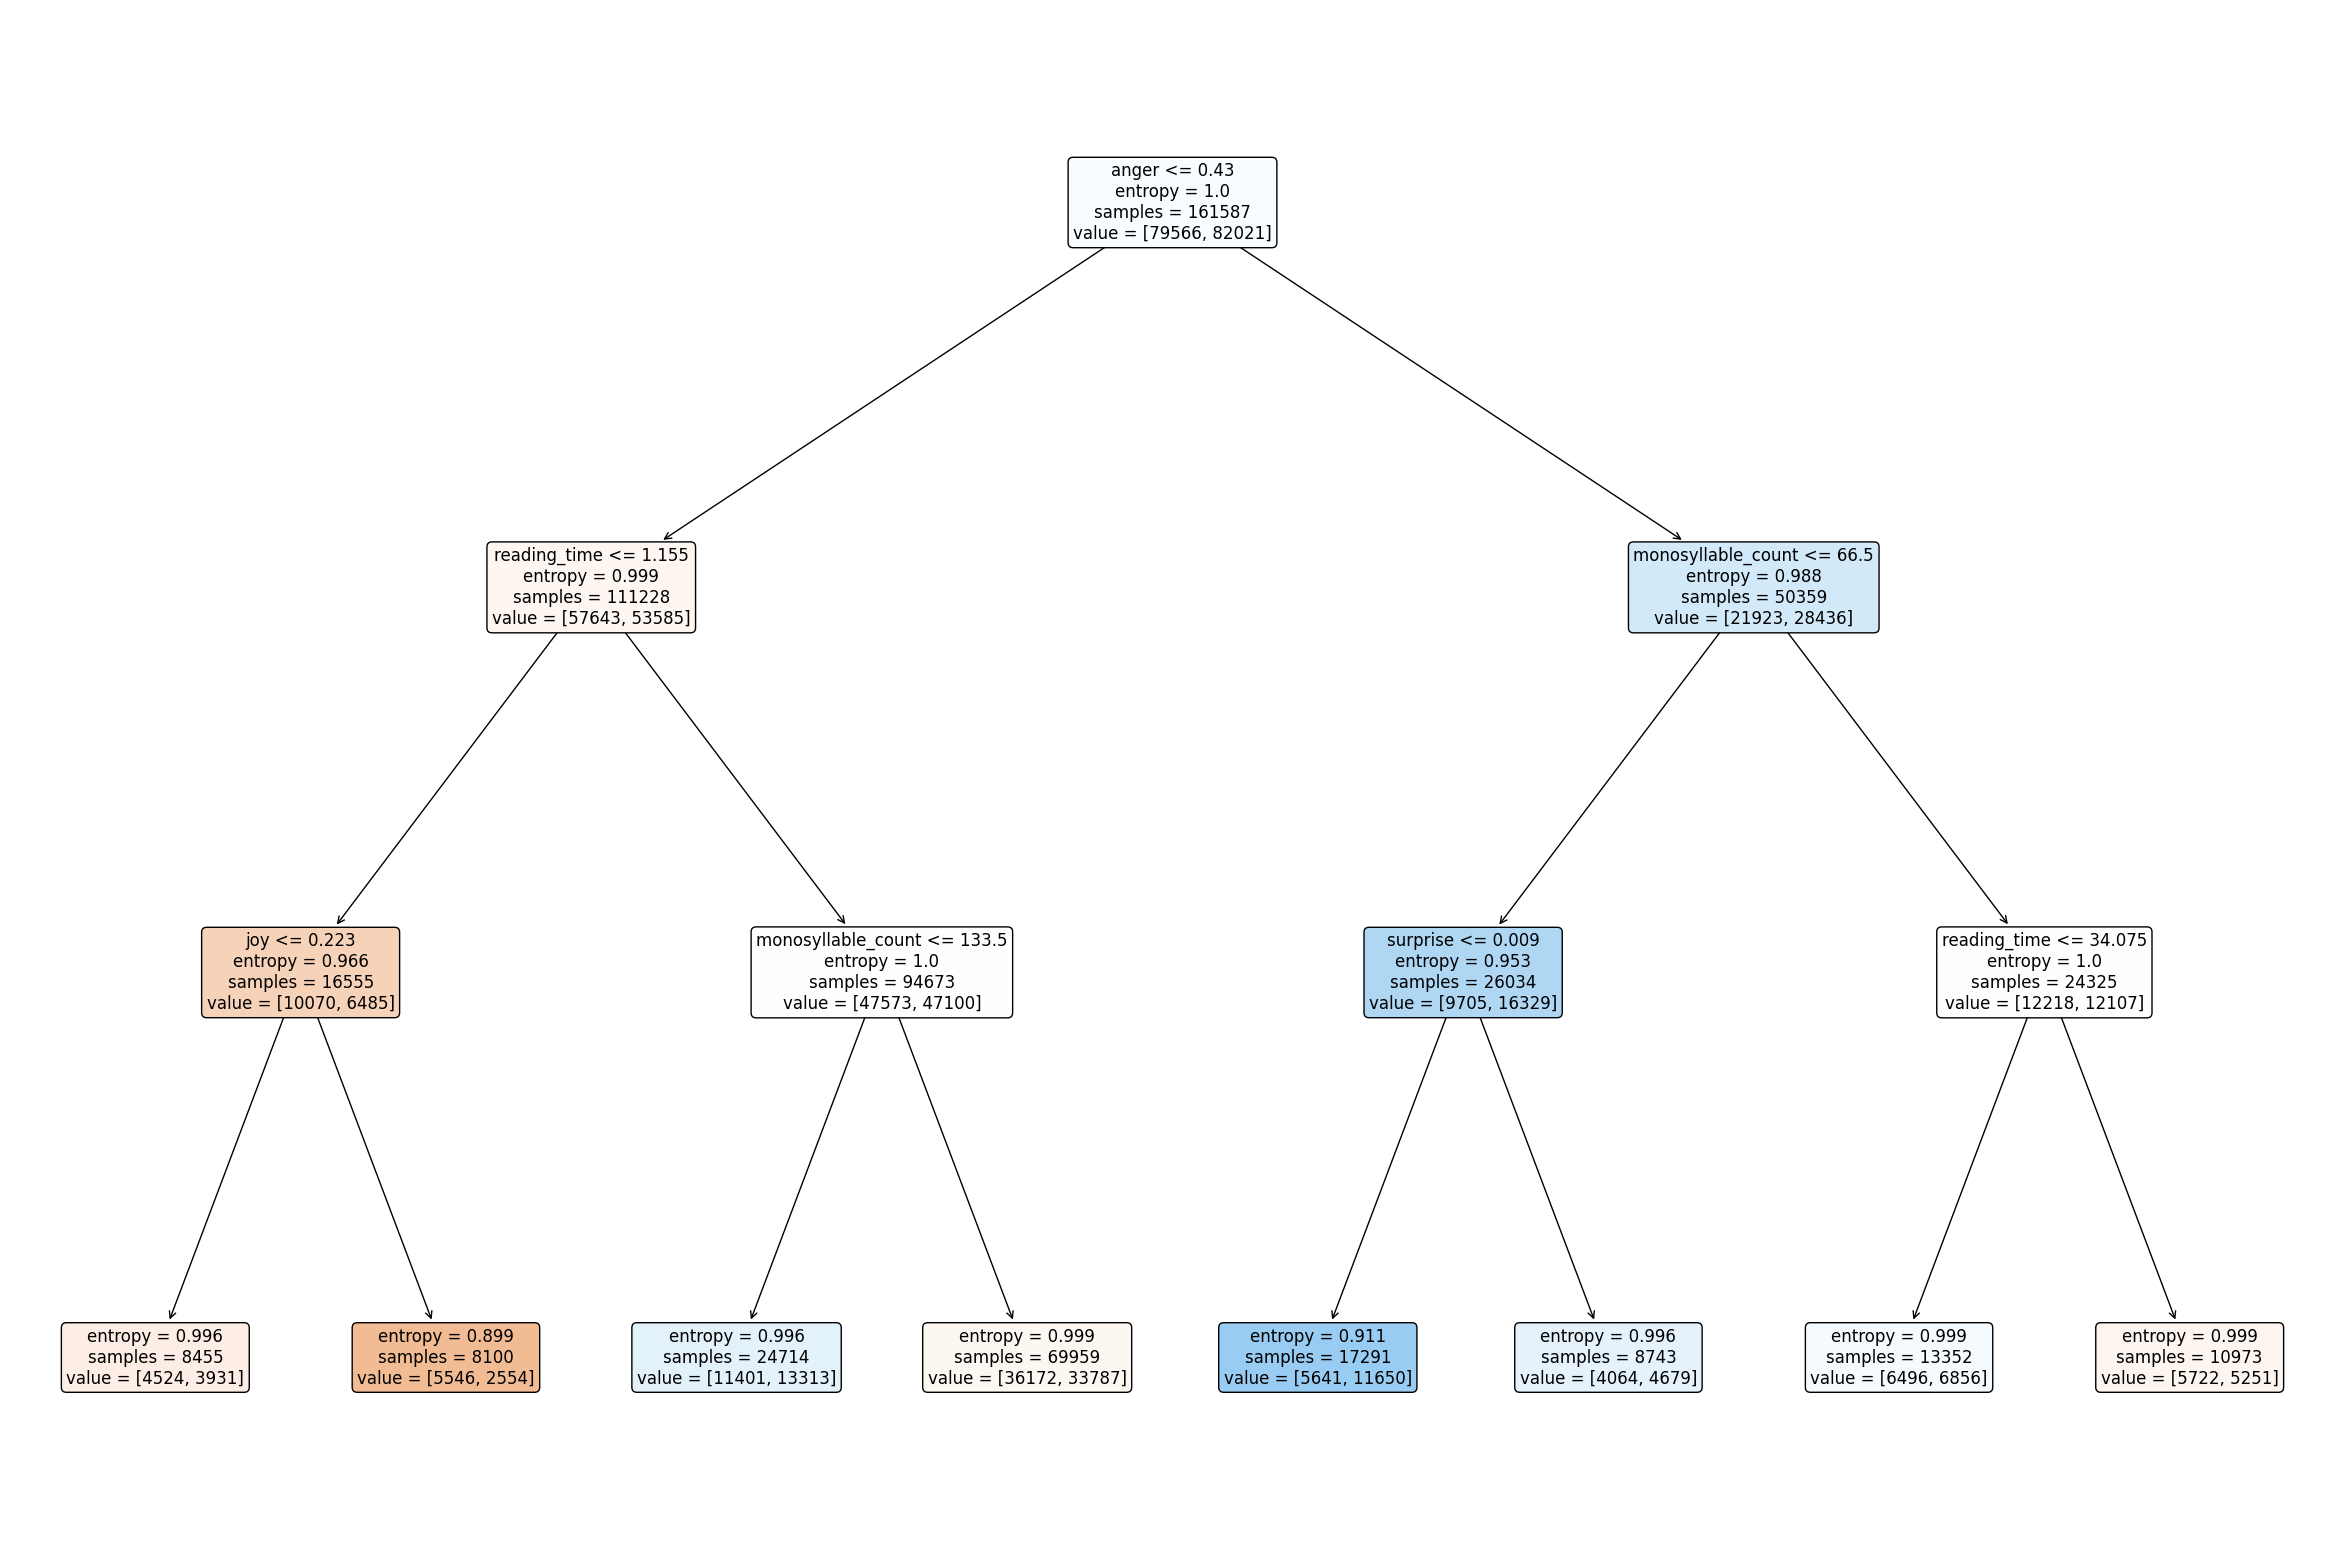

In [33]:
plt.figure(figsize=(30,20))   
tree.plot_tree(preprunned_tree,filled=True, rounded= True, feature_names=X_train.columns, fontsize=12)
plt.show()

In [34]:
predicted_test= preprunned_tree.predict(X_test)

In [35]:
print (classification_report (y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.53      0.65      0.59     19884
           1       0.57      0.44      0.50     20513

    accuracy                           0.55     40397
   macro avg       0.55      0.55      0.54     40397
weighted avg       0.55      0.55      0.54     40397



In [36]:
confusion_matrix(y_test, predicted_test)

array([[12998,  6886],
       [11442,  9071]], dtype=int64)

### Naive-Bayes

#### Normal probability distribution

In [37]:
nb_classifier= GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
predicted_test= nb_classifier.predict(X_test)

In [39]:
print (classification_report (y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.53      0.23      0.32     19884
           1       0.52      0.80      0.63     20513

    accuracy                           0.52     40397
   macro avg       0.52      0.52      0.47     40397
weighted avg       0.52      0.52      0.48     40397



In [40]:
confusion_matrix(y_test, predicted_test)

array([[ 4524, 15360],
       [ 4046, 16467]], dtype=int64)

### Logistic regression

In [41]:
logistic_model = LogisticRegression(max_iter= 1000)

In [19]:
hyperparam_grid = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'C': np.logspace(-4, 4, 50),
    'penalty':['l1', 'l2']
}

In [22]:
randomSearch = RandomizedSearchCV(LogisticRegression(), hyperparam_grid, cv=3,scoring='accuracy', n_jobs=-1) 
randomSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [23]:
randomSearch.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 6866.488450042998}

In [26]:
logistic_model_bp = LogisticRegression(max_iter= 1000, solver='newton-cg', penalty = 'l2', C=6866.488450042998 )

In [27]:
pipe_data = make_pipeline(StandardScaler(), logistic_model_bp)
pipe_data.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=6866.488450042998, max_iter=1000,
                                    solver='newton-cg'))])

In [28]:
y_predicted_bp = pipe_data.predict(X_test)

In [29]:
confusion_matrix(y_test, y_predicted_bp)

array([[ 9758, 10126],
       [ 8611, 11902]], dtype=int64)

In [30]:
print (classification_report (y_test, y_predicted_bp))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51     19884
           1       0.54      0.58      0.56     20513

    accuracy                           0.54     40397
   macro avg       0.54      0.54      0.53     40397
weighted avg       0.54      0.54      0.54     40397



In [ ]:
pipe_data = make_pipeline(StandardScaler(), logistic_model)
pipe_data.fit(X_train, y_train)

In [ ]:
y_predicted = pipe_data.predict(X_test)

In [44]:
confusion_matrix(y_test, y_predicted)

array([[ 9756, 10128],
       [ 8615, 11898]], dtype=int64)

In [45]:
print (classification_report (y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51     19884
           1       0.54      0.58      0.56     20513

    accuracy                           0.54     40397
   macro avg       0.54      0.54      0.53     40397
weighted avg       0.54      0.54      0.54     40397



Now with a threshold of 0.30

In [46]:
pipe_data2 = make_pipeline(StandardScaler(), LogisticRegression(max_iter= 1000))
pipe_data2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [47]:
prob_1= pipe_data2.predict_proba(X_test)[:,1]

In [48]:
y_predicted_prob030 = [1 if prob > 0.30 else 0 for prob in prob_1]

In [49]:
confusion_matrix (y_test.astype(int), y_predicted_prob030)

array([[   56, 19828],
       [   43, 20470]], dtype=int64)

In [50]:
print (classification_report (y_test.astype(int), y_predicted_prob030))

              precision    recall  f1-score   support

           0       0.57      0.00      0.01     19884
           1       0.51      1.00      0.67     20513

    accuracy                           0.51     40397
   macro avg       0.54      0.50      0.34     40397
weighted avg       0.54      0.51      0.34     40397



### Random forest

In [51]:
rf = RandomForestClassifier(n_estimators = 300, criterion='gini', max_features=4, random_state=1)

In [52]:
rf.fit (X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=300, random_state=1)

In [53]:
y_predicted_rf= rf.predict(X_test)

In [54]:
confusion_matrix(y_test, y_predicted_rf)

array([[ 6960, 12924],
       [12590,  7923]], dtype=int64)

In [55]:
print (classification_report (y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       0.36      0.35      0.35     19884
           1       0.38      0.39      0.38     20513

    accuracy                           0.37     40397
   macro avg       0.37      0.37      0.37     40397
weighted avg       0.37      0.37      0.37     40397



#### Bagging

In [56]:
bagging_forest = RandomForestClassifier(n_estimators = 300, 
                                             criterion='gini', 
                                             class_weight= 'balanced', 
                                             max_features=None, 
                                             random_state=1)

In [57]:
bagging_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=300, random_state=1)

In [58]:
y_predicted_bf= bagging_forest.predict(X_test)

In [59]:
confusion_matrix(y_test, y_predicted_bf)

array([[ 7041, 12843],
       [12636,  7877]], dtype=int64)

In [60]:
print (classification_report (y_test, y_predicted_bf))

              precision    recall  f1-score   support

           0       0.36      0.35      0.36     19884
           1       0.38      0.38      0.38     20513

    accuracy                           0.37     40397
   macro avg       0.37      0.37      0.37     40397
weighted avg       0.37      0.37      0.37     40397



### KNN

In [61]:
pipe_default= make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='brute', n_neighbors=11, weights= 'uniform'))

In [62]:
pipe_default.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=11))])

In [63]:
y_predicted= pipe_default.predict(X_test)

In [64]:
print (classification_report (y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46     19884
           1       0.48      0.48      0.48     20513

    accuracy                           0.47     40397
   macro avg       0.47      0.47      0.47     40397
weighted avg       0.47      0.47      0.47     40397



In [73]:
!streamlit run Final_Project_EDA.py

^C


In [85]:
coef = logistic_model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0.001)]
X_train_1 = X_train[imp_features]
X_test_1 = X_test[imp_features]

In [86]:
X_train_1

,anger,sadness,fear,joy,surprise,love,reading_time,flesch_reading_ease,SMOG_Index,monosyllable_count,polysyllable_count,monosyllabic_ratio,polysyllabic_ratio,main_emotion_anger,main_emotion_fear,main_emotion_joy,main_emotion_love,main_emotion_sadness,main_emotion_surprise
124717,0.490724,0.189319,0.179901,0.129205,0.006626,0.004225,1.84,66.74,0.0,16,4,0.615385,0.153846,1,0,0,0,0,0
171696,0.333634,0.098177,0.364483,0.165322,0.019361,0.019022,0.76,46.44,0.0,4,1,0.500000,0.125000,0,1,0,0,0,0
50623,0.220641,0.273599,0.199223,0.281205,0.004290,0.021041,20.83,46.51,13.7,174,38,0.642066,0.140221,0,0,1,0,0,0
173024,0.156501,0.237534,0.065060,0.526225,0.001860,0.012820,6.82,26.85,17.5,42,19,0.512195,0.231707,0,0,1,0,0,0
133719,0.126590,0.162730,0.069992,0.619095,0.007747,0.013846,25.44,66.98,12.1,255,42,0.712291,0.117318,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73918,0.489054,0.206617,0.064487,0.216685,0.002298,0.020858,28.90,60.65,11.8,258,48,0.638614,0.118812,1,0,0,0,0,0
110120,0.019983,0.086744,0.094681,0.699237,0.005676,0.093680,57.95,61.90,13.3,605,101,0.725420,0.121103,0,0,1,0,0,0
50440,0.130565,0.425701,0.042824,0.377796,0.001103,0.022012,33.26,42.55,15.3,275,68,0.639535,0.158140,0,0,0,0,1,0
5223,0.453572,0.082676,0.226099,0.221759,0.008414,0.007481,6.30,58.32,12.2,52,10,0.611765,0.117647,1,0,0,0,0,0


Coefficients: 
Anger : 0.06631727
Sadness : -0.01118298
Fear